In [8]:
import numpy as np
import os
import sys
from yaml import load
import csv

from IPython.display import Image, display
import PIL.Image
from cStringIO import StringIO

lib_dir = os.path.join(os.getcwd(), "..", "preprocessing")
sys.path.insert(0, lib_dir)

import audio
import graphic
from preprocessing_commons import apply_melfilter, generate_spectrograms, read_wav_dirty, sliding_audio, downsample

%matplotlib inline

In [9]:
config = load(open("../learning/config.yaml", "rb"))
csv_reader = csv.reader(open(config["train_data_dir"] ))

audio_files = [filename for (filename, label) in csv_reader]

In [14]:
def show_array(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

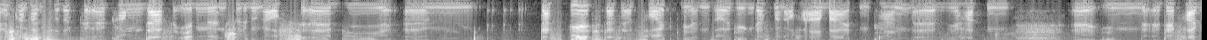

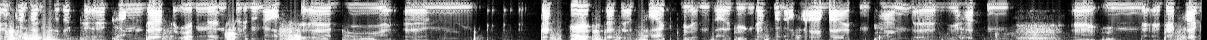

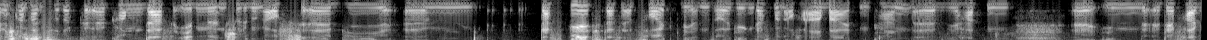

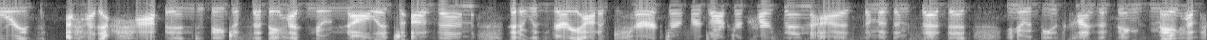

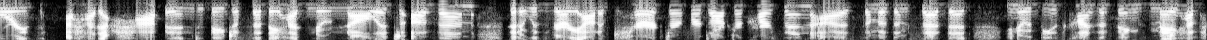

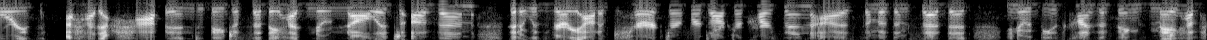

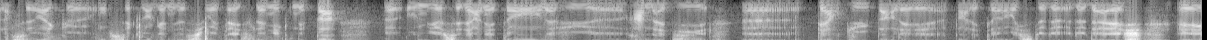

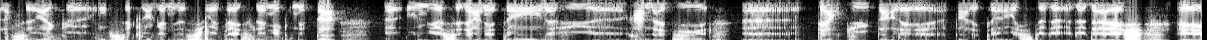

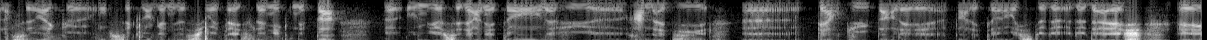

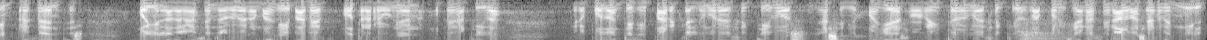

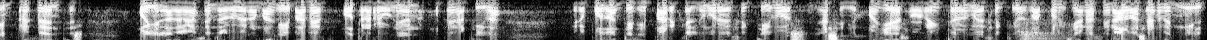

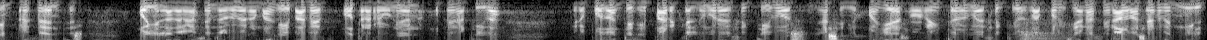

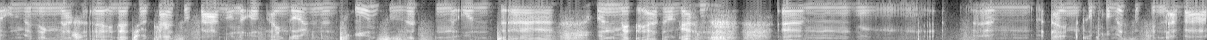

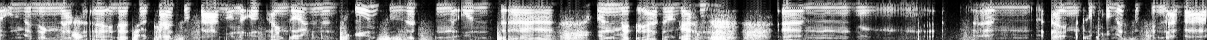

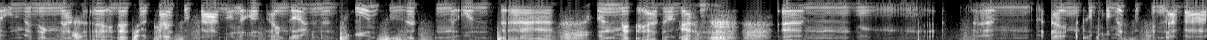

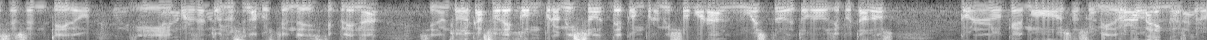

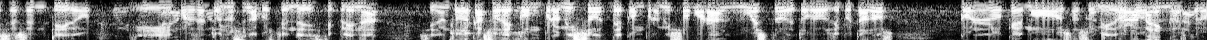

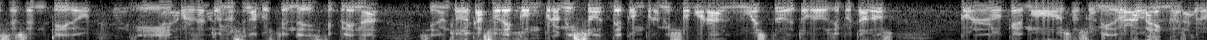

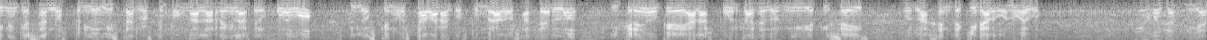

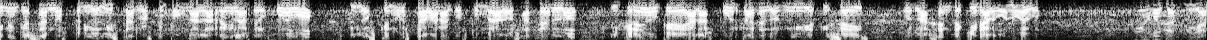

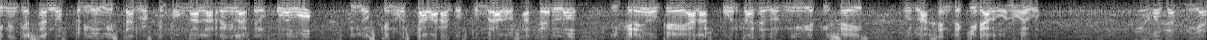

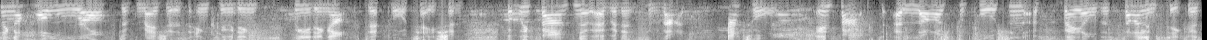

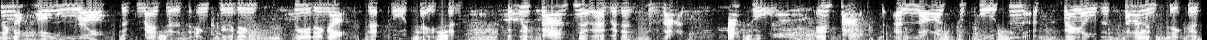

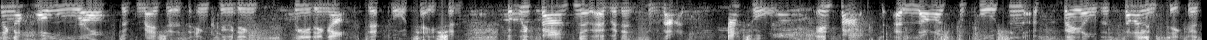

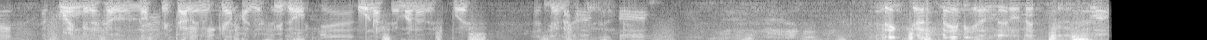

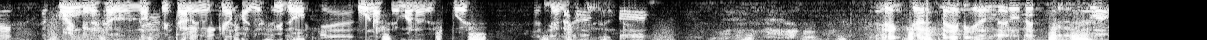

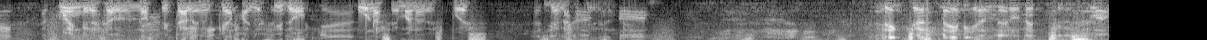

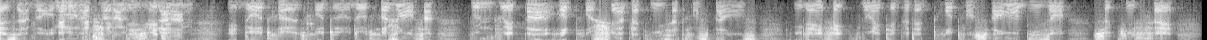

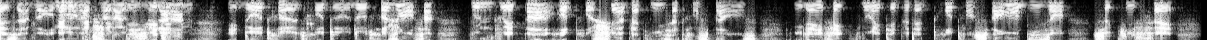

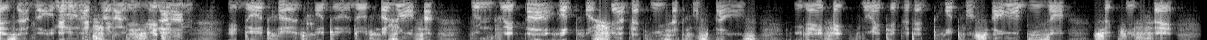

In [18]:
results = []
for file in audio_files[:10]:
    
    f, signal, samplerate = read_wav_dirty(file)

    _, mel_image = apply_melfilter(f, signal, samplerate, nfilt=40)
    mel_image = graphic.colormapping.to_grayscale(mel_image, bytes=True)
    
    mel_image_equalized = graphic.histeq.histeq(mel_image)
    mel_image_clamp_equal = graphic.histeq.clamp_and_equalize(mel_image)
    
    results += [mel_image, mel_image_equalized, mel_image_clamp_equal]
    
for image in results:
    padded_image = graphic.windowing.pad_window(image, 1207) 
    show_array(padded_image)
